In [1]:
# Let's run the preprocessing on both train and test data
from libs.simple_processing import normalize, separate_target, dropna_rows, remove_columns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from constants import source_path, target_name, x_path, y_path

DATA = pd.read_csv(source_path)

print("Done")

Done


In [2]:
# embedding = reducer.fit_transform(DATA)
# # embedding.shape
# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1],
#     c=[sns.color_palette()[i] for i in DATA[target_name]])
# # c=[sns.color_palette()[i] for i in DATA[target_name].map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection', fontsize=14)

In [3]:
# DATA = remove_columns(DATA, ['citric acid'])
# DATA = remove_columns(DATA, ['density'])
# DATA = remove_columns(DATA, ['pH'])


X, y = separate_target(DATA, target_name)
X = dropna_rows(X, X.columns)

# Data Normalization
X = normalize(X)

# Data Categorization
# from libs.simple_processing import categorize
# X_train, X_valid = categorize(X_train, X_valid)
# print("Done")

print(X.shape)

(1599, 11)


In [16]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [4]:
# Dimension reduction
import umap
import umap.plot
import matplotlib.pyplot as plt
import seaborn as sns
from babyplots import Babyplot

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)
print(embedding.shape)
print(embedding)
# reducer3d = umap.UMAP(random_state=42, n_components=3)
# embedding3d = reducer3d.fit_transform(X)
# bp = Babyplot()
# bp.add_plot(
#     embedding3d.tolist(),
#     "pointCloud",
#     "categories",
#     y.values.tolist(),
#     {
#         "colorScale": "Set2",
#         "showLegend": True,
#         "folded": True,
#         "foldedEmbedding": embedding.tolist()
#     })
# html = bp.save_as_html('./babyplot.html')

print("Done")


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(1599, 2)
[[13.03977    5.6499157]
 [11.935551   5.625297 ]
 [11.910967   5.288921 ]
 ...
 [ 9.803592   8.291407 ]
 [ 9.957675   8.327785 ]
 [ 6.727463   8.675569 ]]
Done


[[16.681631   4.566635 ]
 [14.515558   4.666919 ]
 [14.570035   4.585607 ]
 ...
 [15.49489    9.735076 ]
 [14.4147005  8.858109 ]
 [ 7.10478    9.339294 ]]
CPU times: user 5.85 s, sys: 760 ms, total: 6.61 s
Wall time: 3.45 s


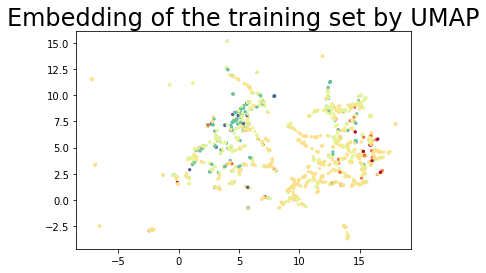

In [19]:
%%time
reduced = umap.UMAP(n_neighbors=5).fit(X)
plt.scatter(reduced.embedding_[:, 0], reduced.embedding_[:, 1], s=5, c=y, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24)

print(reduced.embedding_)
# umap.plot.points(mapper)

In [18]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [7]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [8]:
X.to_csv(x_path)
y.to_csv(y_path)

print("Done")

Done
